# Perceptron Simple: Implementation from Scratch

## Dependency importation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Data Loading

In [2]:
def load_or():
    
#     train = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1]])
#     test = np.array([[1, 1, 1]])

    train = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
    test = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
    
    return np.asmatrix(train, dtype = 'float64'), np.asmatrix(test, dtype = 'float64')

In [3]:
def load_and():
    
#     train = np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1]])
#     test = np.array([[1, 0, 0]])

    train = np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1], [1, 0, 0]])
    test = np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1], [1, 0, 0]])
    
    return np.asmatrix(train, dtype = 'float64'), np.asmatrix(test, dtype = 'float64')

In [4]:
def load_xor():
    
#     train = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1]])
#     test = np.array([[1, 1, 0]])

    train = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]])
    test = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]])
    
    return np.asmatrix(train, dtype = 'float64'), np.asmatrix(test, dtype = 'float64')

## Start training Algorithm

In [5]:
def forward(X, w):
    #1- combinaison
    Z = np.dot(X, w.T)
    
    #2- activation / prediction
    A = np.where(Z > 0, 1.0, 0.0)
    
    return A

In [6]:
# prediction function
def predict(X, w):
    X = np.insert(X, 0, 1, axis = 1)
    return forward(X, w)

In [7]:
def error(Y, A):
    #error calculation: J(w) = 1/2m Sum((a-y)^2)
    m = Y.shape[0]
    return (1 / (2*m) ) * np.sum(np.where((A - Y) == 0, 0, 1))

In [8]:
def gradient(X, Y, A):
    m = X.shape[0]
    
    # 3- Calcul de l'erreur
    E = error(Y, A)
    
    #4- calcul du gradient
    dZ = A - Y
    dw = (1/m) * np.dot(dZ.T, X)
    
    
    return dw, E


In [9]:
# learning function
def fit(X, Y, lr=0.1, epoch=10):
    
    X = np.insert(X, 0, 1, axis = 1)
    
    #0- initialize weight w to zeros
    w = np.zeros((Y.shape[1], X.shape[1]))
    
    errors = []
    for i in range(epoch):
        
        A = forward(X, w)
        dw, E = gradient(X, Y, A)
        
        w = w - lr*dw
        
        errors.append(E)
        
    return w, errors
    

In [10]:
def plot_learning_curve(epoch, errors):
    plt.figure(figsize=(10, 5))
    plt.plot(range(epoch), errors)
    plt.ylim(0, 1)
    plt.xlim(0, epoch-1)
    plt.xlabel("Epoch")
    plt.ylabel("Error")

In [11]:
# Perceptron model
def perceptron(train, lr=0.1, epoch=10, verbose=True):
    """
    train: matrix of training dataset 
    lr: learning rate
    epoch: number of learning iteration
    """
    w, errors = fit(train[:, :-1], train[:, -1], lr=lr, epoch=epoch)

    if verbose:
        print("Weight w = ", w, "accuracy = ", 1 - errors[-1])
    
    plot_learning_curve(epoch, errors)
    return w, errors


In [12]:
def evaluation(X, y, w, verbose=True):
    y_pred = predict(X, w)
    if verbose:
        print("Test Data: ", X, y)
        print("Prediction: ", y_pred)
        
    print("Accuracy: : ", 1 - error(y, y_pred))

Weight w =  [[-0.025  0.05   0.05 ]] accuracy =  1.0
Test Data:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [[0.]
 [1.]
 [1.]
 [1.]]
Prediction:  [[0.]
 [1.]
 [1.]
 [1.]]
Accuracy: :  1.0


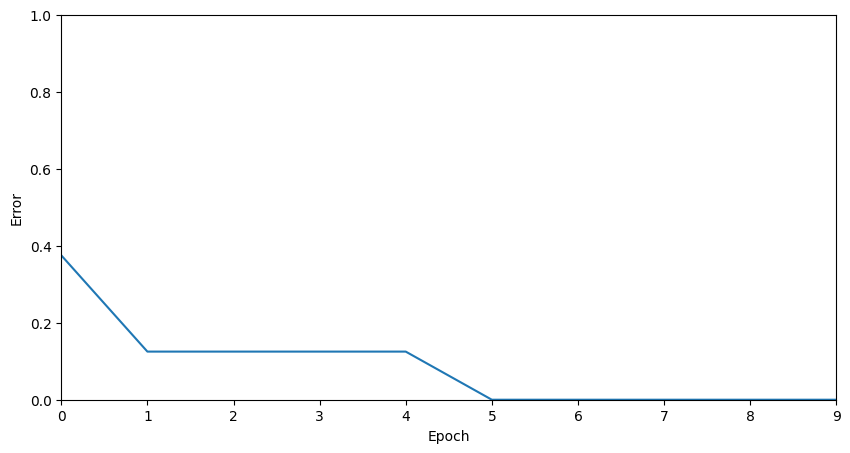

In [13]:
## Dataset boolean OR function
lr = 0.1
epoch = 10
train, test = load_or()

w, errors = perceptron(train, lr, epoch)
# plot_learning_curve(epoch, errors)
evaluation(test[:, :-1], test[:, -1], w)


Weight w =  [[-0.025  0.025  0.025]] accuracy =  1.0
Test Data:  [[0. 0.]
 [0. 1.]
 [1. 1.]
 [1. 0.]] [[0.]
 [0.]
 [1.]
 [0.]]
Prediction:  [[0.]
 [0.]
 [1.]
 [0.]]
Accuracy: :  1.0


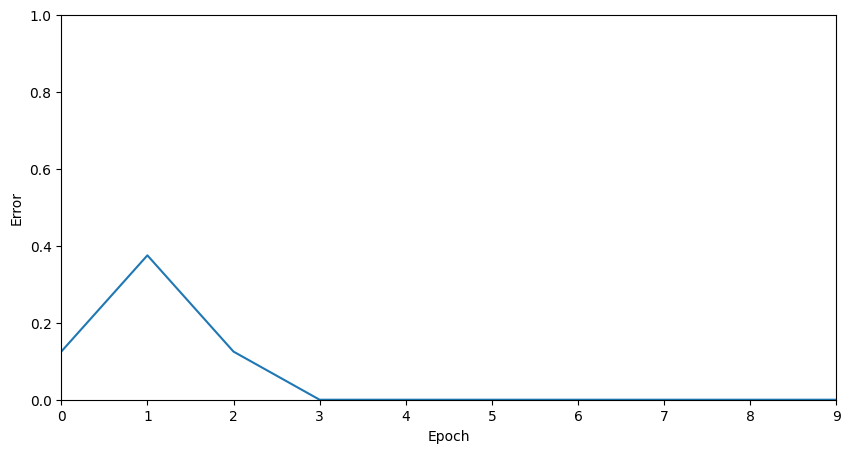

In [14]:
## Dataset AND
lr = 0.1
epoch = 10
train, test = load_and()

w, errors = perceptron(train, lr, epoch)
# plot_learning_curve(epoch, errors)
evaluation(test[:, :-1], test[:, -1], w)

Weight w =  [[0. 0. 0.]] accuracy =  0.75
Test Data:  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [[0.]
 [1.]
 [1.]
 [0.]]
Prediction:  [[0.]
 [0.]
 [0.]
 [0.]]
Accuracy: :  0.75


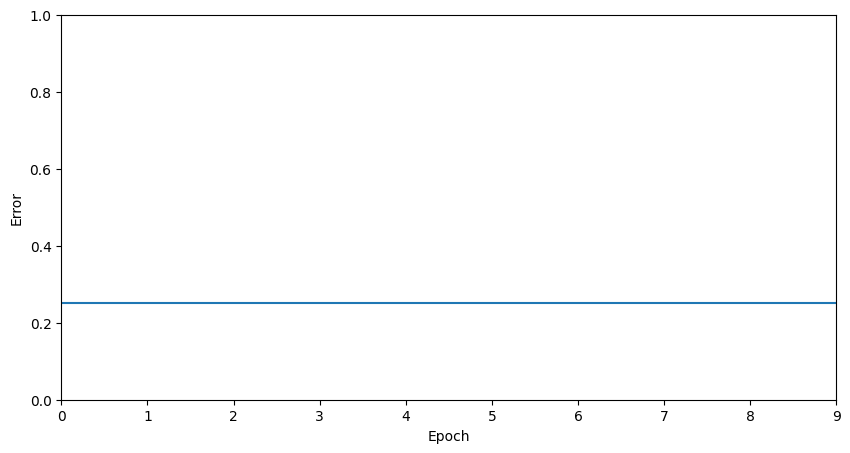

In [15]:
## Dataset XOR
lr = 0.1
epoch = 10
train, test = load_xor()

w, errors = perceptron(train, lr, epoch)
# plot_learning_curve(epoch, errors)
evaluation(test[:, :-1], test[:, -1], w)

In [16]:
# We can see that the XOR function can not be learned with Perceptron. It is a non linear separable function

In [17]:
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

df = pd.read_csv("data/iris.data", names=names)
df
    

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
df = df[:100]
df['class'] = np.where(df.iloc[:, -1] == 'Iris-setosa', 0, 1)
df

/tmp/ipykernel_20731/1806302240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = np.where(df.iloc[:, -1] == 'Iris-setosa', 0, 1)


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [19]:
test = df.sample(25)
test

,sepal length,sepal width,petal length,petal width,class
85,6.0,3.4,4.5,1.6,1
60,5.0,2.0,3.5,1.0,1
80,5.5,2.4,3.8,1.1,1
37,4.9,3.1,1.5,0.1,0
64,5.6,2.9,3.6,1.3,1
28,5.2,3.4,1.4,0.2,0
11,4.8,3.4,1.6,0.2,0
51,6.4,3.2,4.5,1.5,1
25,5.0,3.0,1.6,0.2,0
44,5.1,3.8,1.9,0.4,0


In [20]:
test = df.loc[df.index % 4 == 0, :]
test.shape

(25, 5)

In [21]:
train = df.loc[df.index % 4 != 0, :]
train.shape

(75, 5)

In [22]:
data = np.asmatrix(train, dtype='float64'),  np.asmatrix(test, dtype='float64')

Weight w =  [[-0.04533333 -0.07906667 -0.24453333  0.35906667  0.1508    ]] accuracy =  1.0
Accuracy: :  1.0


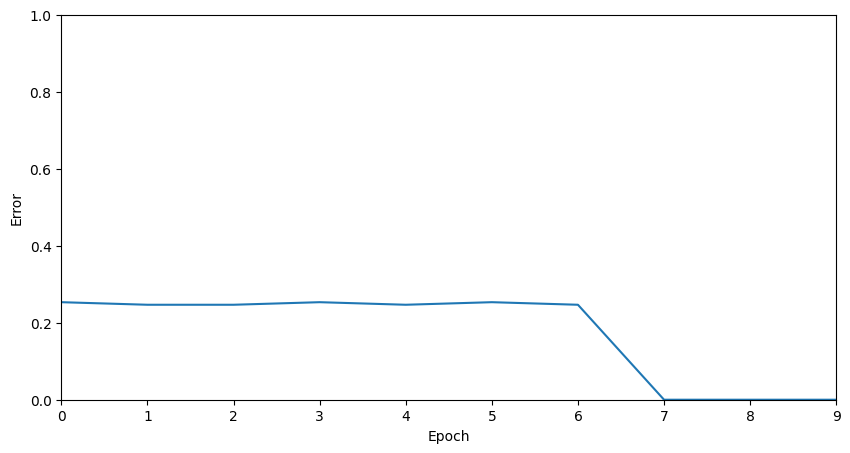

In [23]:
## Dataset Iris
lr = 0.1
epoch = 10
train, test = data

w, errors = perceptron(train, lr, epoch)
# plot_learning_curve(epoch, errors)
evaluation(test[:, :-1], test[:, -1], w, False)

In [24]:
# save model

with open('data/iris_model_bin.pickle', 'wb') as f:
    pickle.dump(w, f)
    


In [25]:
# utilisation du model en production

with open('data/iris_model_bin.pickle', 'rb') as f:
    model = pickle.load(f)
model


matrix([[-0.04533333, -0.07906667, -0.24453333,  0.35906667,  0.1508    ]])

In [26]:
x = np.asmatrix([[5.6, 2.9, 3.6, 1.3]])
predict(x, model)

array([[1.]])